# UK Accidents Analysis

In [1]:
### Download the dataset and the first library

import pandas as pd

In [2]:
data = pd.read_csv('C:/Andre files/Andre datasets/archive/accidents_2005_to_2011.csv')
data

C:\Users\andre\AppData\Local\Temp\ipykernel_22864\955080357.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Andre files/Andre datasets/archive/accidents_2005_to_2011.csv')


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039448,2.01E+12,305230.0,606490.0,-3.495884,55.343306,98,3,1,1,17/12/2011,...,No physical crossing within 50 meters,Darkeness: No street lighting,Other,Frost/Ice,None,None,2,Yes,NaN,2011
1039449,2.01E+12,306780.0,593150.0,-3.467026,55.223770,98,2,1,1,19/12/2011,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Frost/Ice,None,None,2,Yes,NaN,2011
1039450,2.01E+12,304120.0,609140.0,-3.514288,55.366895,98,3,2,1,17/12/2011,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Frost/Ice,None,None,2,Yes,NaN,2011
1039451,2.01E+12,316740.0,583760.0,-3.307730,55.141194,98,3,1,1,19/12/2011,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,Pedestrian in carriageway (not injured),2,Yes,NaN,2011


### Data cleaning and preparation

#### - Look at some information about this data
#### - Fix any missing data

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039453 entries, 0 to 1039452
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1039453 non-null  object 
 1   Location_Easting_OSGR                        1039352 non-null  float64
 2   Location_Northing_OSGR                       1039352 non-null  float64
 3   Longitude                                    1039352 non-null  float64
 4   Latitude                                     1039352 non-null  float64
 5   Police_Force                                 1039453 non-null  int64  
 6   Accident_Severity                            1039453 non-null  int64  
 7   Number_of_Vehicles                           1039453 non-null  int64  
 8   Number_of_Casualties                         1039453 non-null  int64  
 9   Date                                         1

In [4]:
# Let's get some stats from the dataset
data.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,1.039352e+06,1.039352e+06,1.039352e+06,1.039352e+06,1.039453e+06,1.039453e+06,1.039453e+06,1.039453e+06,1.039453e+06,1.039453e+06,1.039453e+06,1.039453e+06,1.039453e+06,0.0,1.039453e+06,1.039453e+06,1.039453e+06,1.039453e+06
mean,4.377378e+05,3.008436e+05,-1.464108e+00,5.259561e+01,3.096595e+01,2.840304e+00,1.833180e+00,1.358354e+00,4.123018e+00,3.558814e+02,4.095984e+00,1.008663e+03,3.935214e+01,NaN,2.625367e+00,3.818438e+02,1.361223e+00,2.007779e+03
std,9.550744e+04,1.616868e+05,1.404277e+00,1.455850e+00,2.556001e+01,4.017410e-01,7.174441e-01,8.271377e-01,1.927945e+00,2.590951e+02,1.435557e+00,1.829296e+03,1.427543e+01,NaN,3.212512e+00,1.308223e+03,4.806195e-01,2.153613e+00
min,6.495000e+04,1.052000e+04,-7.516225e+00,4.991449e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+01,NaN,-1.000000e+00,-1.000000e+00,1.000000e+00,2.005000e+03
25%,3.733800e+05,1.784700e+05,-2.399877e+00,5.149247e+01,7.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.240000e+02,3.000000e+00,0.000000e+00,3.000000e+01,NaN,-1.000000e+00,0.000000e+00,1.000000e+00,2.006000e+03
50%,4.377700e+05,2.731800e+05,-1.434748e+00,5.234546e+01,3.100000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.280000e+02,4.000000e+00,1.240000e+02,3.000000e+01,NaN,3.000000e+00,0.000000e+00,1.000000e+00,2.007000e+03
75%,5.214200e+05,3.977842e+05,-2.415125e-01,5.347538e+01,4.600000e+01,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.320000e+02,6.000000e+00,7.190000e+02,5.000000e+01,NaN,6.000000e+00,0.000000e+00,2.000000e+00,2.010000e+03
max,6.553700e+05,1.208800e+06,1.759398e+00,6.075754e+01,9.800000e+01,3.000000e+00,3.400000e+01,8.700000e+01,7.000000e+00,9.410000e+02,6.000000e+00,9.999000e+03,7.000000e+01,NaN,6.000000e+00,9.999000e+03,3.000000e+00,2.011000e+03


In [5]:
# Let's now find all numeric variables
numerics = ['int64', 'int32', 'int64', 'float64', 'float32', 'float64']

num_data = data.select_dtypes(include=numerics)
len(num_data.columns)

18

In [6]:
# Percentages of missing values
data.isna().sum().sort_values(ascending=False)

Junction_Detail                                1039453
Junction_Control                                424225
LSOA_of_Accident_Location                        79520
Did_Police_Officer_Attend_Scene_of_Accident       2920
Road_Surface_Conditions                           1203
Weather_Conditions                                 126
Time                                               104
Latitude                                           101
Longitude                                          101
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Pedestrian_Crossing-Physical_Facilities             34
Carriageway_Hazards                                 26
Pedestrian_Crossing-Human_Control                   17
Special_Conditions_at_Site                          13
Urban_or_Rural_Area                                  0
2nd_Road_Class                                       0
Light_Conditions                                     0
2nd_Road_N

In [7]:
# Let's get these numbers as a percentage of the total
miss_percentage = data.isna().sum().sort_values(ascending=False) / len(data) * 100

miss_percentage

Junction_Detail                                100.000000
Junction_Control                                40.812331
LSOA_of_Accident_Location                        7.650178
Did_Police_Officer_Attend_Scene_of_Accident      0.280917
Road_Surface_Conditions                          0.115734
Weather_Conditions                               0.012122
Time                                             0.010005
Latitude                                         0.009717
Longitude                                        0.009717
Location_Easting_OSGR                            0.009717
Location_Northing_OSGR                           0.009717
Pedestrian_Crossing-Physical_Facilities          0.003271
Carriageway_Hazards                              0.002501
Pedestrian_Crossing-Human_Control                0.001635
Special_Conditions_at_Site                       0.001251
Urban_or_Rural_Area                              0.000000
2nd_Road_Class                                   0.000000
Light_Conditio

In [8]:
# Checking the type of the missing data
type(miss_percentage)

pandas.core.series.Series

<AxesSubplot:>

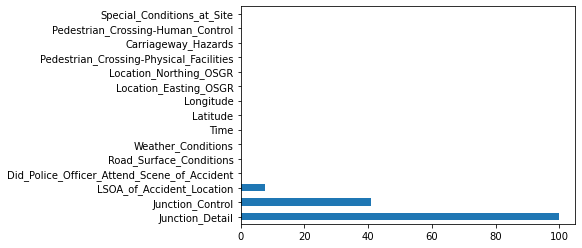

In [9]:
# Let's get rid of zeros and plot it
miss_percentage[miss_percentage != 0].plot(kind='barh')

In [10]:
# Let's drop these columns since they are useless for our analysis 
data.drop(['Junction_Control', 'Junction_Detail'], 1, inplace=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_22864\410304182.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['Junction_Control', 'Junction_Detail'], 1, inplace=True)


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039453 entries, 0 to 1039452
Data columns (total 31 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1039453 non-null  object 
 1   Location_Easting_OSGR                        1039352 non-null  float64
 2   Location_Northing_OSGR                       1039352 non-null  float64
 3   Longitude                                    1039352 non-null  float64
 4   Latitude                                     1039352 non-null  float64
 5   Police_Force                                 1039453 non-null  int64  
 6   Accident_Severity                            1039453 non-null  int64  
 7   Number_of_Vehicles                           1039453 non-null  int64  
 8   Number_of_Casualties                         1039453 non-null  int64  
 9   Date                                         1

### Exploratory analysis and Visualisation 

#### columns to analyse
##### 1 county
##### 2 Time
##### 3 Accident_Severity
##### 4 Day_of_the_Week
##### 5 Number_of_Casualities 
##### 6 Road_Type
##### 7 Weather_Conditions
##### 8 Light_Conditions

In [12]:
data.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

##### Location

In [13]:
data.Longitude

0         -0.191170
1         -0.211708
2         -0.206458
3         -0.173862
4         -0.156618
             ...   
1039448   -3.495884
1039449   -3.467026
1039450   -3.514288
1039451   -3.307730
1039452   -3.329010
Name: Longitude, Length: 1039453, dtype: float64

In [14]:
data.Latitude

0          51.489096
1          51.520075
2          51.525301
3          51.482442
4          51.495752
             ...    
1039448    55.343306
1039449    55.223770
1039450    55.366895
1039451    55.141194
1039452    55.059182
Name: Latitude, Length: 1039453, dtype: float64

In [15]:
# visualisation tool
import seaborn as sns
sns.set_style("darkgrid")

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

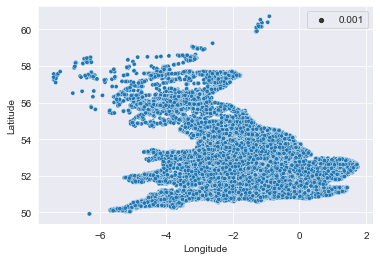

In [16]:
# let's firs take a look at the data using a scatterplot
# Latitude = up and down and Longitude = Left to Right
# let's make a sample to work faster with the data

sample_data = data.sample(int(0.1 * len(data)))
sns.scatterplot(x = sample_data.Longitude, y = sample_data.Latitude, size=0.001)

In [35]:
# As we now have less density let's put this on a map
import sys
!{sys.executable} -m pip install folium

In [17]:
import folium

In [18]:
lat, lon = data.Latitude[0], data.Longitude[0]
lat, lon

(51.489096, -0.19117)

In [19]:
# A heatmap would be nice but we need to reduce the size of our dataset
from folium.plugins import HeatMap

In [20]:
# we need a list of lats and longs for the heatmap (let's zip that into a list of pairs)
list(zip(list(data.Latitude), list(data.Longitude)))

[(51.489096, -0.19117),
 (51.520075, -0.211708),
 (51.525301, -0.206458),
 (51.482442, -0.173862),
 (51.495752, -0.156618),
 (51.51554, -0.203238),
 (51.512695, -0.211277),
 (51.50226, -0.187623),
 (51.48342, -0.167342),
 (51.512443, -0.206531),
 (51.494902, -0.182872),
 (51.484044, -0.184312),
 (51.491632, -0.192366),
 (51.492622, -0.157753),
 (51.495429, -0.176224),
 (51.481912, -0.18022),
 (51.500191, -0.205139),
 (51.495811, -0.171887),
 (51.486552, -0.16059),
 (51.495498, -0.174925),
 (51.492992, -0.18727),
 (51.513039, -0.204346),
 (51.482076, -0.173445),
 (51.49296, -0.167824),
 (51.498062, -0.166322),
 (51.508265, -0.215629),
 (51.513988, -0.207623),
 (51.488671, -0.192771),
 (51.494902, -0.182872),
 (51.496893, -0.160606),
 (51.517796, -0.215545),
 (51.521988, -0.201543),
 (51.497103, -0.168234),
 (51.519986, -0.211712),
 (51.523585, -0.217769),
 (51.514951, -0.217674),
 (51.478096, -0.189301),
 (51.481804, -0.173312),
 (51.492652, -0.200249),
 (51.500648, -0.193882),
 (51.509

In [21]:
# let's create a sample to work with the heatmap
sample_data = data.sample(int(0.01 * len(data)))
lat_lng_pairs = list(zip(list(sample_data.Latitude), list(sample_data.Longitude)))

In [22]:
map = folium.Map()
HeatMap(lat_lng_pairs[:1000]).add_to(map)
map

#### Accidents per road type

In [36]:
data.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [37]:
data.Road_Type

0          Single carriageway
1            Dual carriageway
2          Single carriageway
3          Single carriageway
4          Single carriageway
                  ...        
1039448      Dual carriageway
1039449    Single carriageway
1039450      Dual carriageway
1039451    Single carriageway
1039452    Single carriageway
Name: Road_Type, Length: 1039453, dtype: object

In [38]:
# Let's get the road types
road_type = data.Road_Type.unique()
len(road_type)

6

In [39]:
# Accidents per road type
Acc_by_road_type = data.Road_Type.value_counts()
Acc_by_road_type

Single carriageway    775683
Dual carriageway      155743
Roundabout             68611
One way street         21907
Slip road              10841
Unknown                 6668
Name: Road_Type, dtype: int64

<AxesSubplot:>

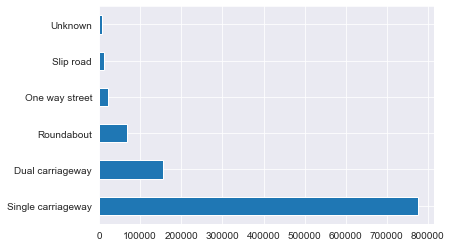

In [40]:
# Let's plot this
Acc_by_road_type.plot(kind='barh')

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Road_Type', ylabel='Density'>

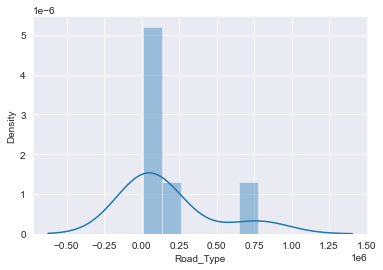

In [41]:
# Let's check the distribution of accidents with a histogram
sns.distplot(Acc_by_road_type) # Looking at the dispersion graph most cities have less than 2000 accidents

In [66]:
sing_carriageway = Acc_by_road_type['Single carriageway']
Unknown = Acc_by_road_type['Unknown']
Slip_road = Acc_by_road_type['Slip road']
One_waystreet = Acc_by_road_type['One way street']
Roundabout = Acc_by_road_type['Roundabout']
Dual_carriageway = Acc_by_road_type['Dual carriageway']

print(sing_carriageway, Unknown, Slip_road, One_waystreet, Roundabout, Dual_carriageway)

775683 6668 10841 21907 68611 155743


In [67]:
total_accidents = 1039453

In [73]:
sing_carr_acc = 775683
Un_known = 6668
Slip_Road = 10841
One_way_street = 21907
Round_about = 68611
Dual_carriage_way = 155743

In [74]:
sing_carr_acc / total_accidents *100

74.62415328061971

In [75]:
Un_known / total_accidents *100

0.6414912458764369

In [76]:
Slip_Road / total_accidents *100

1.0429523990021676

In [77]:
One_way_street / total_accidents *100

2.1075507983525954

In [78]:
Round_about / total_accidents *100

6.600683243975437

In [79]:
Dual_carriage_way / total_accidents *100

14.983169032173652

In [ ]:
#Create a piechart